# Job Application Prediction

Dataset source: https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource/data

The dataset titled "Employability Classification of Over 70,000 Job Applicants" contains a comprehensive collection of information regarding job applicants and their respective employability scores. The dataset has been compiled to assist organizations and recruiters in evaluating the suitability of candidates for various employment opportunities. By utilizing machine learning techniques, this dataset aims to provide valuable insights into the factors influencing employability and enhance the efficiency of the hiring process.

From the survey results, we have built a dataset with the following columns:

* Age: age of the applicant, >35 years old or <35 years old (categorical)
* EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
* Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
* MainBranch: whether the applicant is a profesional developer (categorical)
* YearsCode: how long the applicant has been coding (integer)
* YearsCodePro: how long the applicant has been coding in a professional context, (integer)
* PreviousSalary: the applicant's previous job salary (float)
* ComputerSkills: number of computer skills known by the applicant (integer)
* Employed: target variable, whether the applicant has been hired (categorical)


In [1686]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1687]:
#load dataset
df = pd.read_csv("stackoverflow_full.csv")
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


# 1. Data Analysis

In [1688]:
df.shape

(73462, 15)

In [1689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [1690]:
df.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [1691]:
# check for missing values or NaN
df.isnull().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [1692]:
df.nunique()

Unnamed: 0        73462
Age                   2
Accessibility         2
EdLevel               5
Employment            2
Gender                3
MentalHealth          2
MainBranch            2
YearsCode            51
YearsCodePro         51
Country             172
PreviousSalary    12062
HaveWorkedWith    69980
ComputerSkills       73
Employed              2
dtype: int64

In [1693]:
df.select_dtypes(include='object').nunique()

Age                   2
Accessibility         2
EdLevel               5
Gender                3
MentalHealth          2
MainBranch            2
Country             172
HaveWorkedWith    69980
dtype: int64

# 2. Data Preprocessing

##### Dropping the unecessary columns

In [1694]:
df.drop('Unnamed: 0',axis =1, inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


##### Segment Country into Continent

In [1695]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [1696]:
# Function to segment countries
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Oceania'
    else:
        return 'Others'

# Apply segment function into new column
df['Region'] = df['Country'].apply(segment_country)

In [1697]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Region
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,Europe
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,Asia


In [1698]:
#swap column
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df = swap_columns(df, 'Employed', 'Region')

In [1699]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Region,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,Europe,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,Europe,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,Europe,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,Europe,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,Asia,0


<Axes: xlabel='Region'>

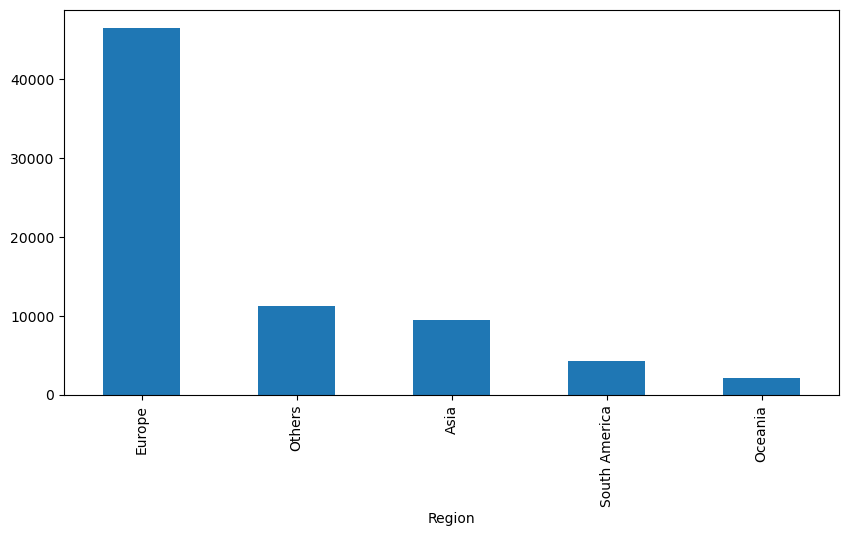

In [1700]:
plt.figure(figsize=(10,5))
df['Region'].value_counts().plot(kind='bar')

In [1701]:
# Remove HaveWorkedWith column because we have ComputerSkills column and the amount of unique value is huge
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [1702]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Region,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,Europe,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,Europe,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,Europe,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,Europe,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,Asia,0


In [1703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  ComputerSkills  73462 non-null  int64  
 12  Region          73462 non-null  object 
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 7.8+ MB


In [1704]:
df.isnull().sum()

Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
ComputerSkills    0
Region            0
Employed          0
dtype: int64

#### Check values and their count in the columns


In [1705]:
print(df['Age'].value_counts())
print(df['Accessibility'].value_counts())
print(df['EdLevel'].value_counts())
print(df['Employment'].value_counts())
print(df['Gender'].value_counts())
# print(df['MentalHealth'].value_counts())
# print(df['MainBranch'].value_counts())
# print(df['YearsCode'].value_counts())
# print(df['YearsCodePro'].value_counts())
# print(df['PreviousSalary'].value_counts())
# print(df['ComputerSkills'].value_counts())
# print(df['Employed'].value_counts())
# print(df['region'].value_counts())

Age
<35    47819
>35    25643
Name: count, dtype: int64
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64
Employment
1    64874
0     8588
Name: count, dtype: int64
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


# 3. Data Exploration

<Axes: xlabel='Employed', ylabel='count'>

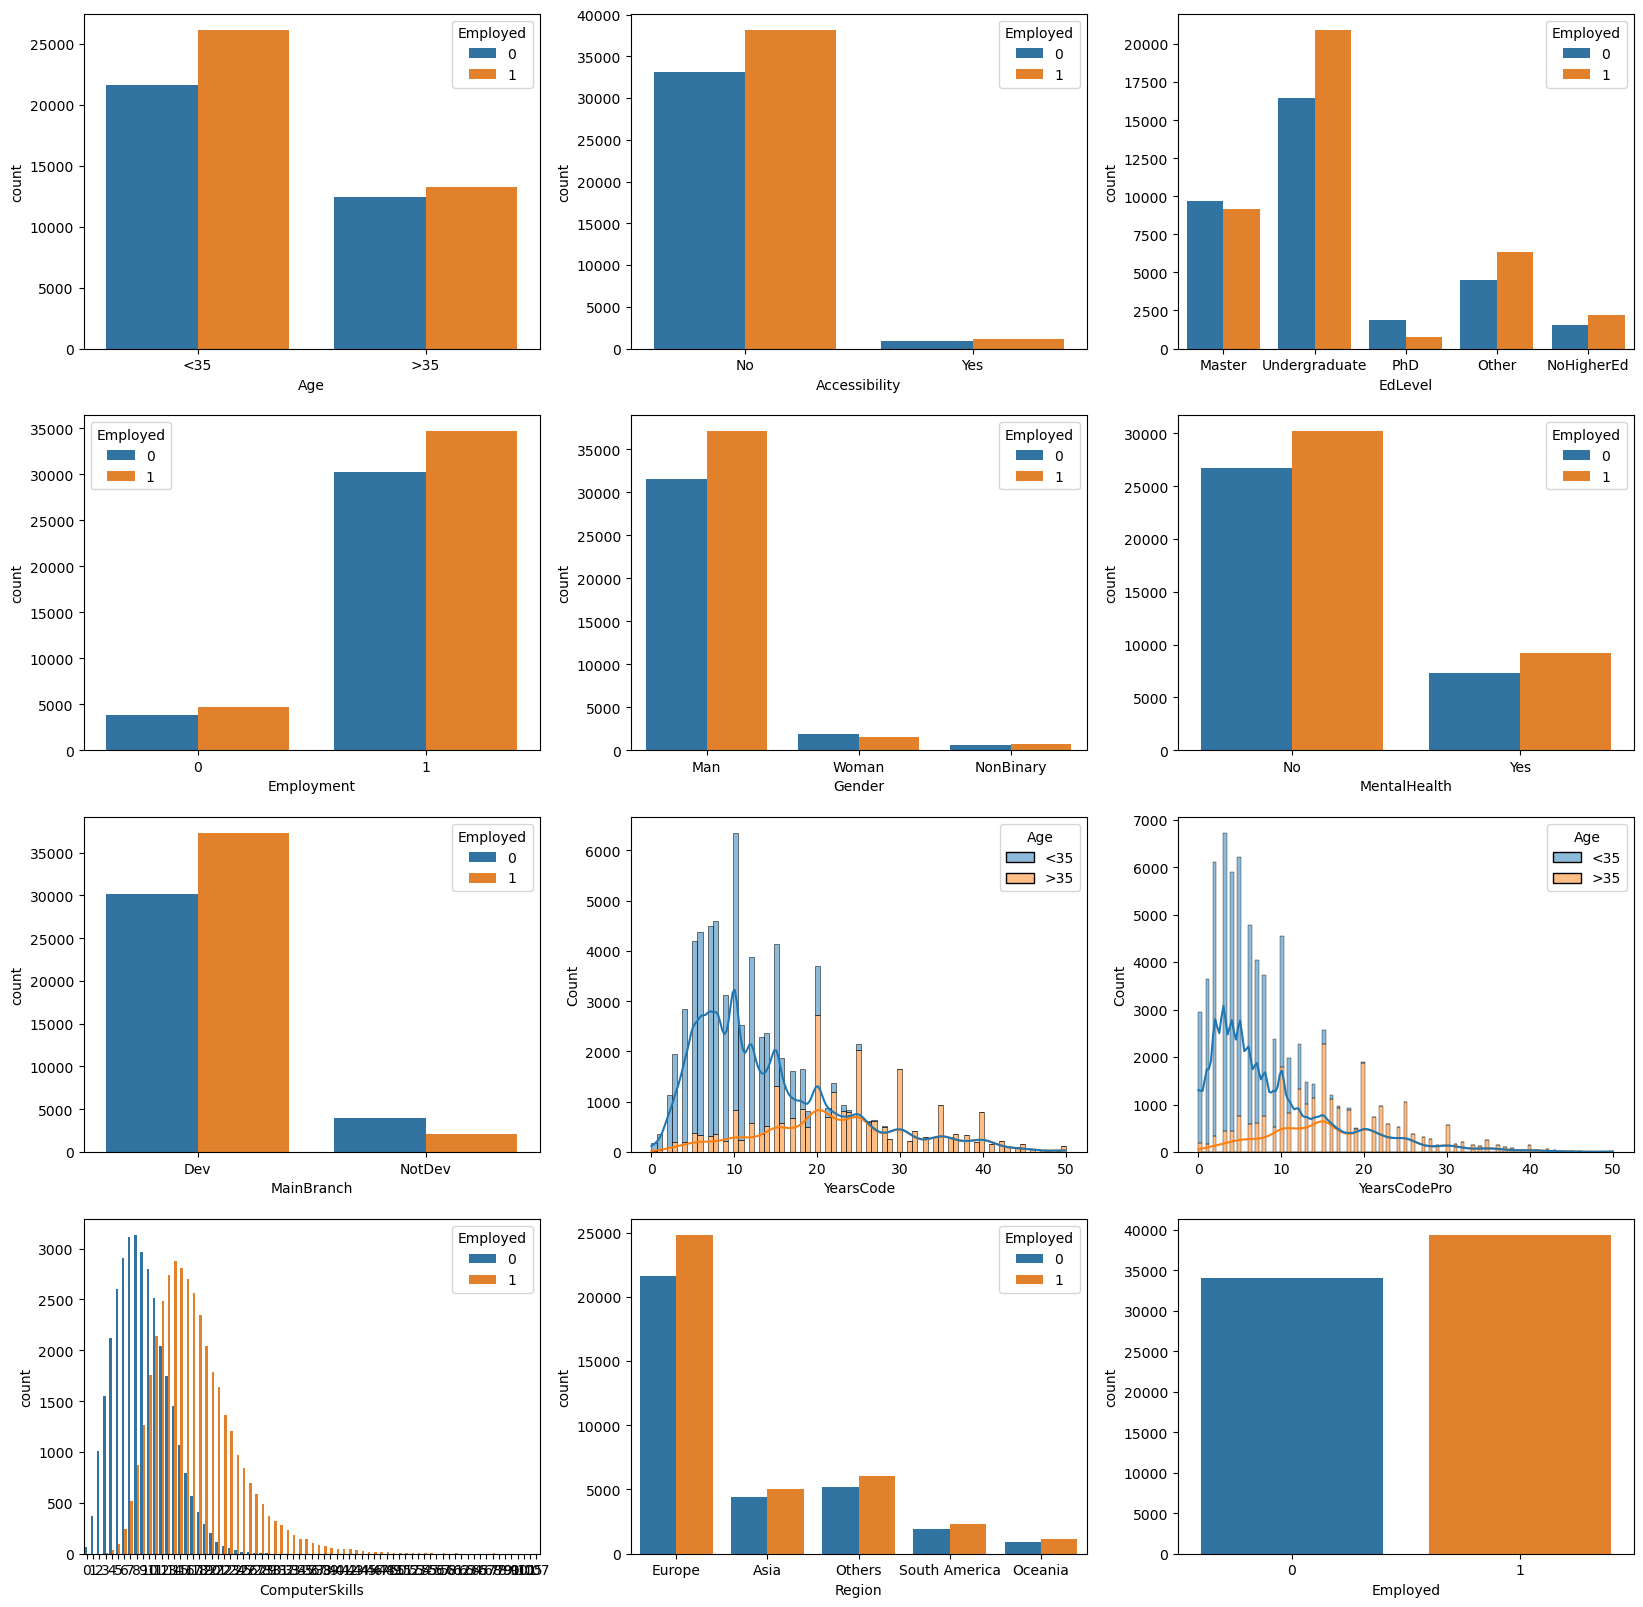

In [1706]:
fig, ax = plt.subplots(4,3,figsize=(20, 20))
# sns.countplot(x = 'Age', data = df, ax=ax[0,0])
sns.countplot(x = 'Age', data = df,hue = 'Employed', ax=ax[0,0])
sns.countplot(x = 'Accessibility', data = df,hue = 'Employed', ax=ax[0,1])
sns.countplot(x = 'EdLevel', data = df,hue = 'Employed', ax=ax[0,2])
sns.countplot(x = 'Employment', data = df,hue = 'Employed', ax=ax[1,0])
sns.countplot(x = 'Gender', data = df,hue = 'Employed', ax=ax[1,1])
sns.countplot(x = 'MentalHealth', data = df,hue = 'Employed', ax=ax[1,2])
sns.countplot(x = 'MainBranch', data = df,hue = 'Employed', ax=ax[2,0])
sns.histplot(x = 'YearsCode', data = df, hue='Age', multiple='stack', kde=True, ax=ax[2,1])
sns.histplot(x = 'YearsCodePro', data = df,hue='Age', multiple='stack', kde=True, ax=ax[2,2])
sns.countplot(x = 'ComputerSkills', data = df, hue = 'Employed', ax=ax[3,0])
sns.countplot(x = 'Region', data = df,hue = 'Employed', ax=ax[3,1])
sns.countplot(x = 'Employed', data = df, ax=ax[3,2])

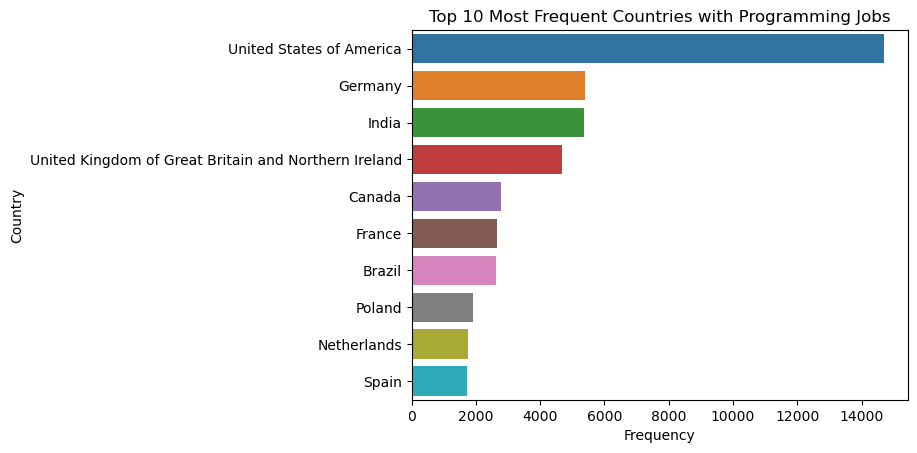

In [1707]:
#get the top 10 countries
top_countries = df['Country'].value_counts().nlargest(10)

sns.barplot(x = top_countries.values, y = top_countries.index)
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 10 Most Frequent Countries with Programming Jobs')
plt.show()

## Identify Outliers

In [1708]:
df.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


### Boxplot for Outliers Detection

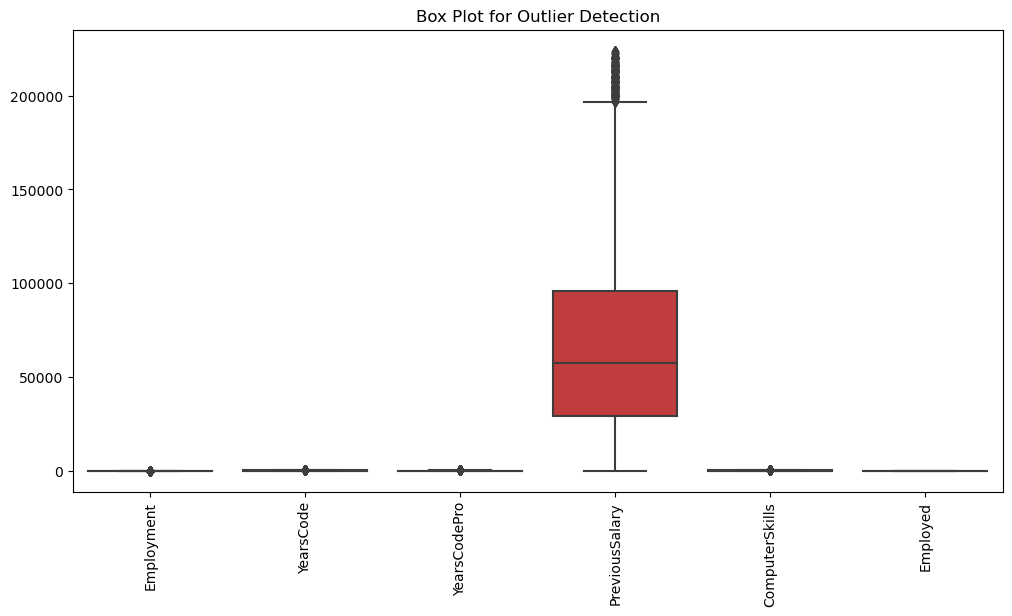

In [1709]:
plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(data=df)
plt.title('Box Plot for Outlier Detection')

# Rotate x-axis labels vertically
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=90)
plt.show()

# 4. Data Preprocessing-2

In [1710]:
#remove Country Column
df.drop('Country',axis =1, inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Region,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,4,Europe,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,12,Europe,1
2,<35,No,Master,1,Man,No,Dev,15,6,77290.0,7,Europe,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,46135.0,13,Europe,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,160932.0,2,Asia,0


In [1711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   PreviousSalary  73462 non-null  float64
 10  ComputerSkills  73462 non-null  int64  
 11  Region          73462 non-null  object 
 12  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 7.3+ MB


### Label Encoding for Categorical Data

In [1712]:
#label encoding for Categorical Data (Object Datatypes)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [1713]:
vars = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Region']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Age : [0 1]
Accessibility : [0 1]
EdLevel : [0 4 3 2 1]
Gender : [0 2 1]
MentalHealth : [0 1]
MainBranch : [0 1]
Region : [1 0 3 4 2]


In [1714]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Region,Employed
0,0,0,0,1,0,0,0,7,4,51552.0,4,1,0
1,0,0,4,1,0,0,0,12,5,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,6,77290.0,7,1,0
3,0,0,4,1,0,0,0,9,6,46135.0,13,1,0
4,1,0,3,0,0,0,1,40,30,160932.0,2,0,0


#### Binning for PreviousSalary

In [1715]:
#binning for PreviousSalary columns
from sklearn.preprocessing import KBinsDiscretizer

#Binning using sklearn
n_bins = 20  # Number of bins
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
df['PreviousSalary'] = bin_encoder.fit_transform(df[['PreviousSalary']])

df.head()

/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Region,Employed
0,0,0,0,1,0,0,0,7,4,4.0,4,1,0
1,0,0,4,1,0,0,0,12,5,4.0,12,1,1
2,0,0,0,1,0,0,0,15,6,6.0,7,1,0
3,0,0,4,1,0,0,0,9,6,4.0,13,1,0
4,1,0,3,0,0,0,1,40,30,14.0,2,0,0


### Data Correlation

<Axes: >

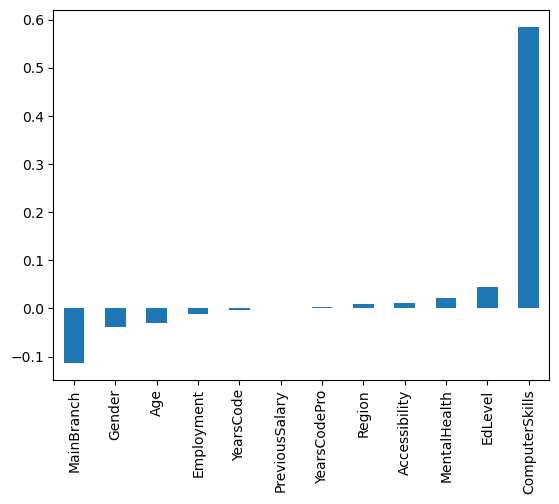

In [1716]:
df.corr()['Employed'][:-1].sort_values().plot(kind='bar')

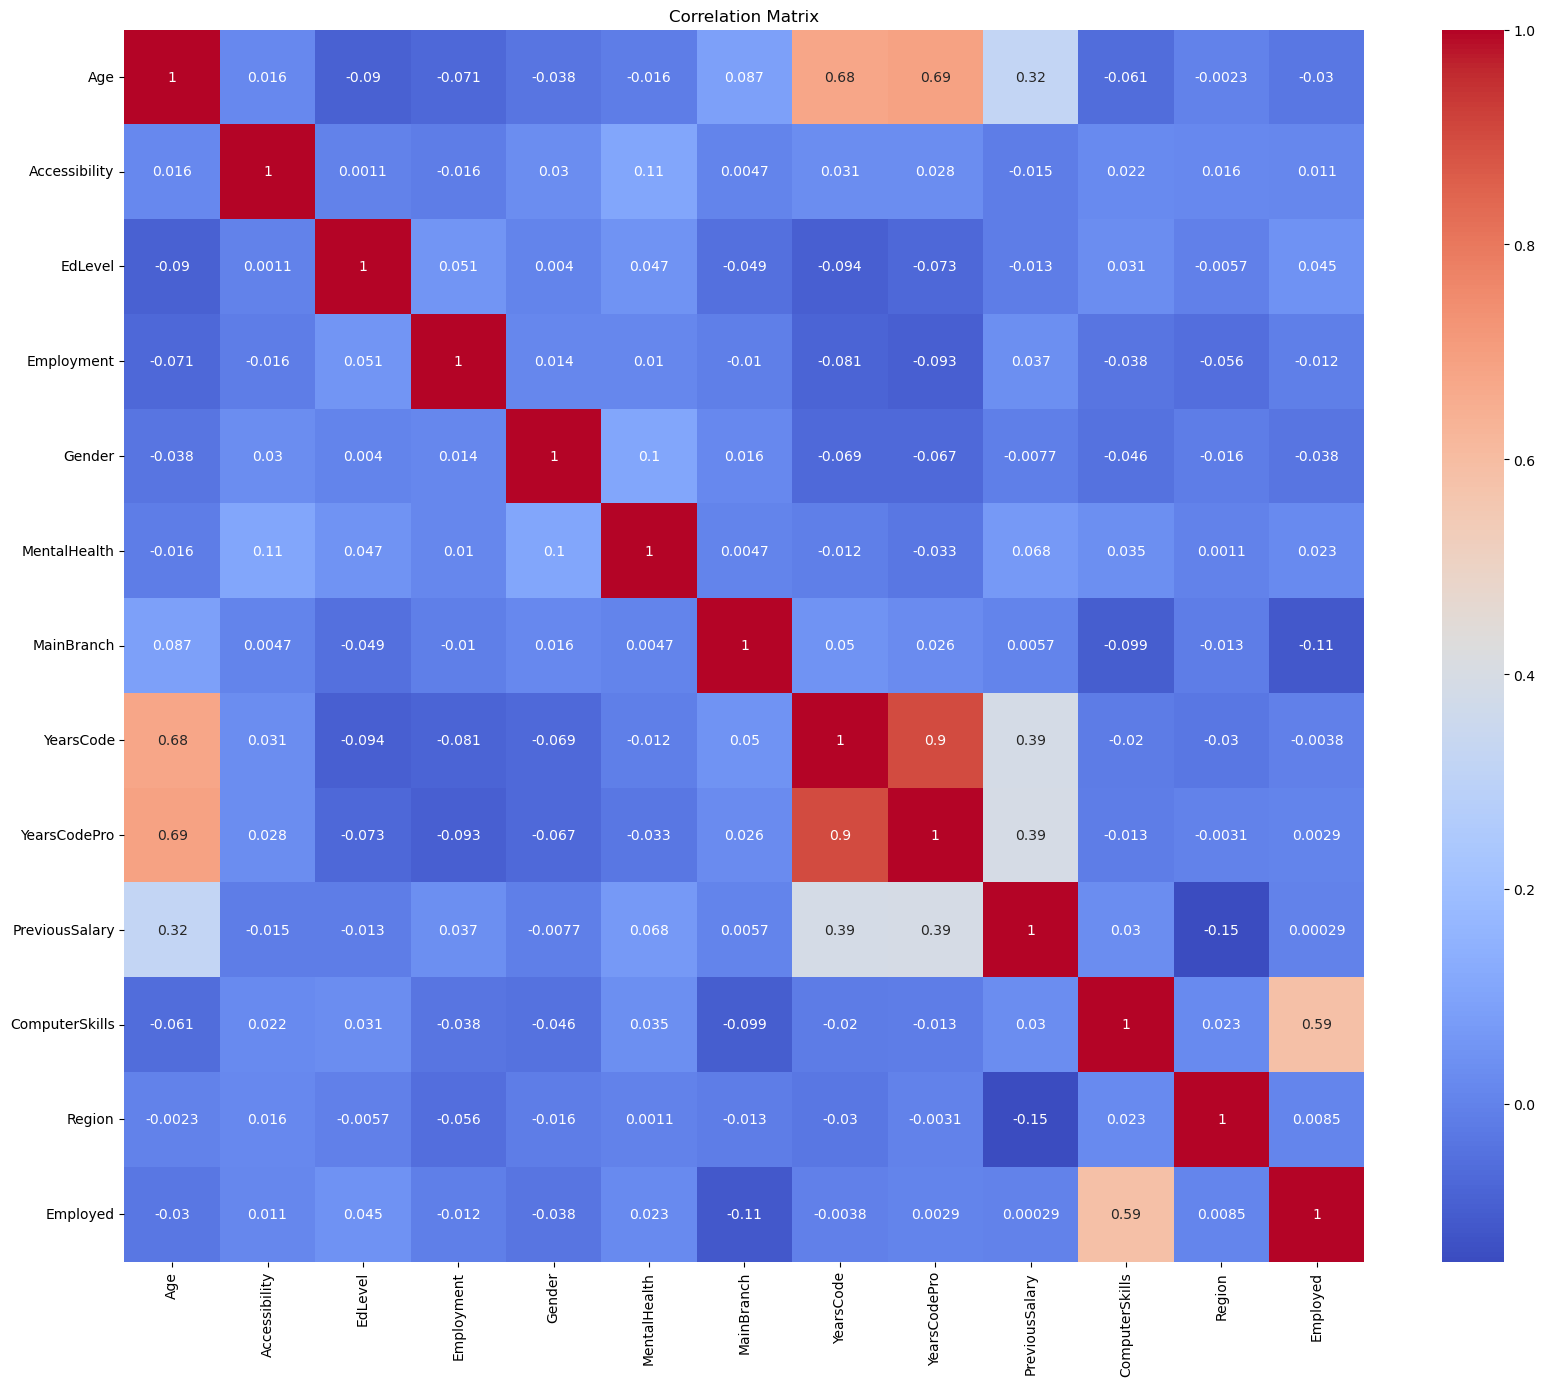

In [1717]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see YearsCode and YearsCodeProare highly Correlated, We can remove YearsCodePro from the dataframe

In [1718]:
df.drop('YearsCodePro',axis =1, inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Region,Employed
0,0,0,0,1,0,0,0,7,4.0,4,1,0
1,0,0,4,1,0,0,0,12,4.0,12,1,1
2,0,0,0,1,0,0,0,15,6.0,7,1,0
3,0,0,4,1,0,0,0,9,4.0,13,1,0
4,1,0,3,0,0,0,1,40,14.0,2,0,0


In [1719]:
df.describe()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Region,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.349065,0.028681,2.488688,0.883096,0.114440,0.224851,0.082573,14.218902,5.546745,13.428221,1.379162,0.536223
std,0.476678,0.166911,1.706744,0.321308,0.443986,0.417487,0.275238,9.405172,4.415676,7.057835,1.070568,0.498690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,2.000000,8.000000,1.000000,0.000000
50%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,12.000000,5.000000,13.000000,1.000000,1.000000
75%,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,20.000000,8.000000,17.000000,1.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,50.000000,19.000000,107.000000,4.000000,1.000000


## Train/Test Split

In [1720]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Employed',axis=1), df['Employed'], test_size=0.3, random_state=42)

## Remove Outlier from Train Data using Z-Score


In [1721]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['YearsCode', 'PreviousSalary', 'ComputerSkills']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

## Model Building

### 1. Decision Tree Classifier

In [1722]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Using GridSearchCV to find the best parameters for the model.

In [1723]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# #Fitting the grid search object to the training data
# grid_dtree.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)

Add the best parameters to the model

In [1724]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0, min_samples_leaf=5)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=0)

In [1725]:
#training the model
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.7811606697218567

### 2. Support Vector Machine (SVM)

In [1726]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [1727]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7847905984845047

### 3. K-Nearest Neighbors (KNN)

In [1728]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [1729]:
# #training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7527111030446028

### 4. Random Forest Classifier

In [1730]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

Using GridSearchCV to find the best parameters for the model.

In [1731]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# rfc = RandomForestClassifier(class_weight='balanced')
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 5, 10],
#     'max_features': ['sqrt', 'log2', None],
#     'random_state': [0, 42]
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(rfc, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

Add the best parameters to the model

In [1732]:
rfc = RandomForestClassifier(random_state=42, max_depth=5, max_features=None, n_estimators=100, class_weight='balanced')
rfc

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=None,
                       random_state=42)

In [1733]:
#training the model
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7832478787603794

### 5. XGboost

In [1734]:
import xgboost as xgb
from xgboost import XGBClassifier

In [1735]:
# xgb = XGBClassifier()
# xgb

# NOTE: GridSearchCV below might take up to more than an hour (63mins) to run!!

In [1736]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# xgb = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss'],
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=make_scorer(accuracy_score),
#     cv=5,  # Number of cross-validation folds
#     verbose=2,  # Increase verbosity to see progress
# )

# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

In [1737]:
#Best parameters found:  {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [1738]:
#training the model
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7848359725940378

## Model Evaluation

### 1. Decision Tree Classifier

In [1739]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, f1_score, mean_squared_error, precision_score, recall_score


In [1740]:
#testing the model
dtree_pred = dtree.predict(X_test)
accuracy_score(y_test, dtree_pred)

0.7811606697218567

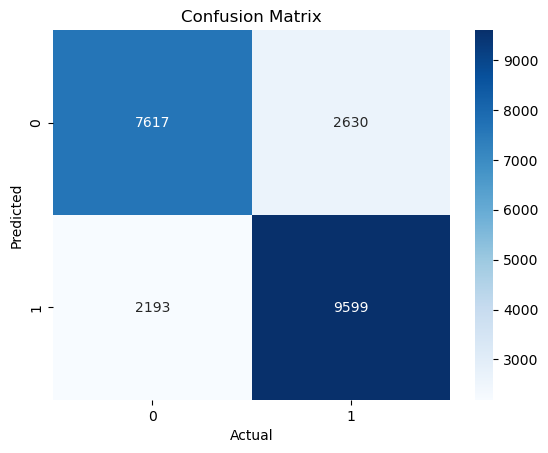

In [1741]:
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/460734539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/460734539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

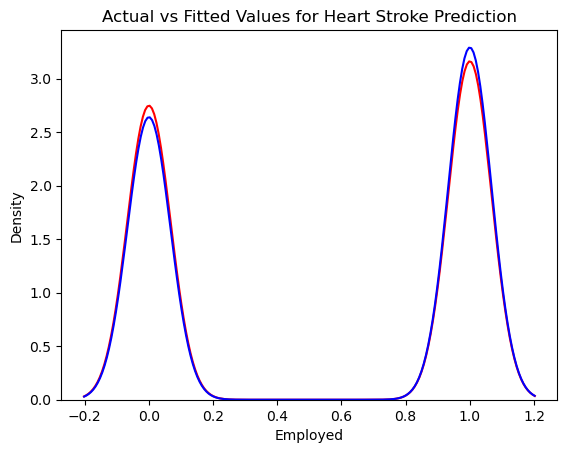

In [1742]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [1743]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10247
           1       0.78      0.81      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



In [1744]:
print('Accuracy Score:',(accuracy_score(y_test, dtree_pred)))
print('F-1 Score : ',(f1_score(y_test, dtree_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, dtree_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, dtree_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, dtree_pred)))

Accuracy Score: 0.7811606697218567
F-1 Score :  0.7811606697218567
Precision Score :  0.7811606697218567
Recall Score :  0.7811606697218567
Log Loss :  7.887768968451928


### 2. Support Vector Machine (SVM)

In [1745]:
#testing the model
svm_pred = svm.predict(X_test)
accuracy_score(y_test, svm_pred)

0.7847905984845047

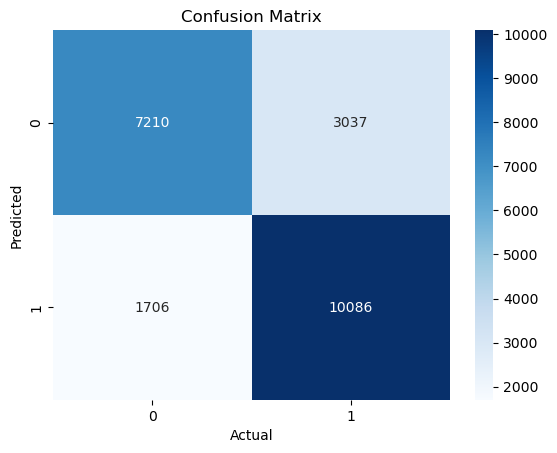

In [1746]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/2931660240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/2931660240.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

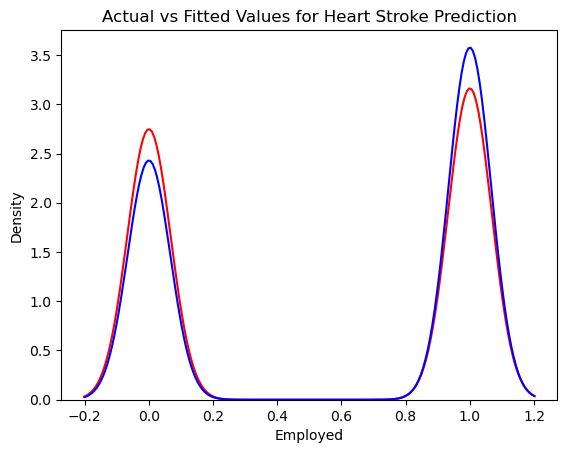

In [1747]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(svm_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [1748]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     10247
           1       0.77      0.86      0.81     11792

    accuracy                           0.78     22039
   macro avg       0.79      0.78      0.78     22039
weighted avg       0.79      0.78      0.78     22039



In [1749]:
print('Accuracy Score:',(accuracy_score(y_test, svm_pred)))
print('F-1 Score : ',(f1_score(y_test, svm_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, svm_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, svm_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, svm_pred)))

Accuracy Score: 0.7847905984845047
F-1 Score :  0.7847905984845047
Precision Score :  0.7847905984845047
Recall Score :  0.7847905984845047
Log Loss :  7.756933074303856


### 3. K-Nearest Neighbors (KNN)

In [1750]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7527111030446028

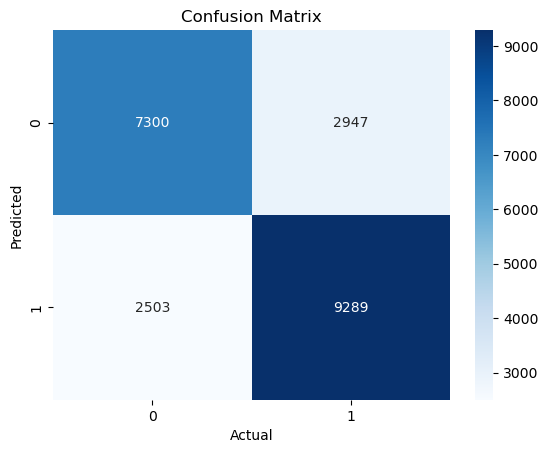

In [1751]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/2082310860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/2082310860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

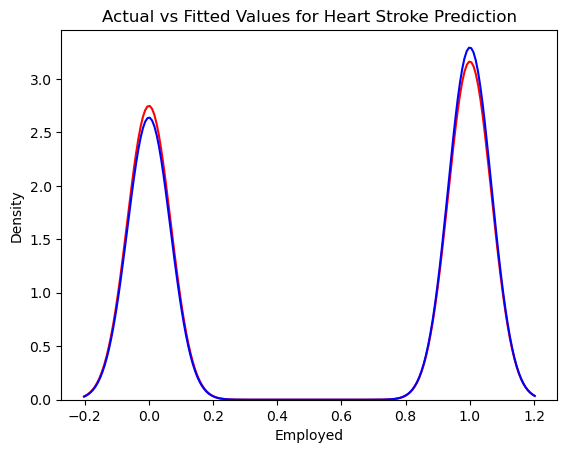

In [1752]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(knn_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [1753]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     10247
           1       0.76      0.79      0.77     11792

    accuracy                           0.75     22039
   macro avg       0.75      0.75      0.75     22039
weighted avg       0.75      0.75      0.75     22039



In [1754]:
print('Accuracy Score:',(accuracy_score(y_test, knn_pred)))
print('F-1 Score : ',(f1_score(y_test, knn_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, knn_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, knn_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, knn_pred)))

Accuracy Score: 0.7527111030446028
F-1 Score :  0.7527111030446028
Precision Score :  0.7527111030446028
Recall Score :  0.7527111030446028
Log Loss :  8.913195288837448


### 4. Random Forest Classifier

In [1755]:
#testing the model
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.7832478787603794

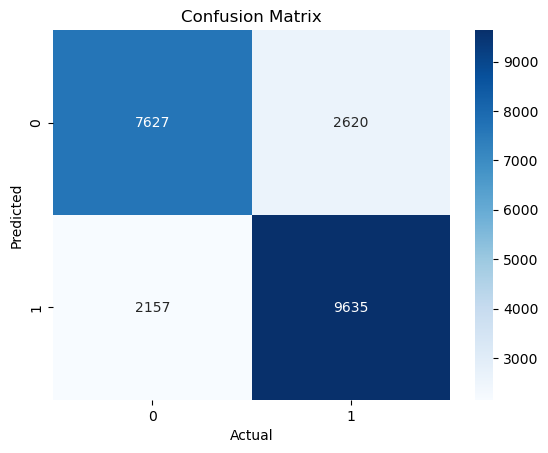

In [1756]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/492257718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_52617/492257718.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

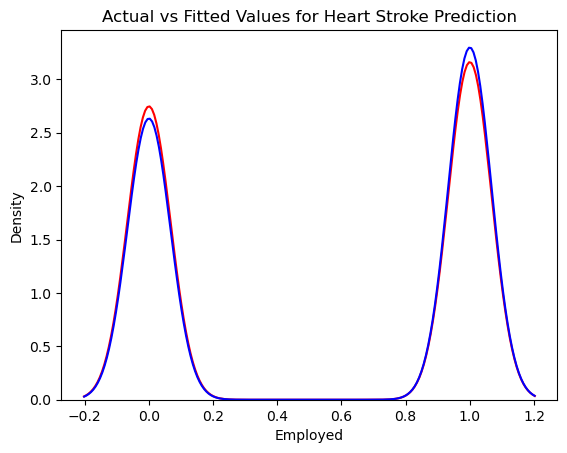

In [1757]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [1758]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10247
           1       0.79      0.82      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



In [1759]:
print('Accuracy Score:',(accuracy_score(y_test, rfc_pred)))
print('F-1 Score : ',(f1_score(y_test, rfc_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, rfc_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, rfc_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, rfc_pred)))    

Accuracy Score: 0.7832478787603794
F-1 Score :  0.7832478787603795
Precision Score :  0.7832478787603794
Recall Score :  0.7832478787603794
Log Loss :  7.812538329316785


### 5. XGboost

In [1760]:
#testing the model
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.7848359725940378

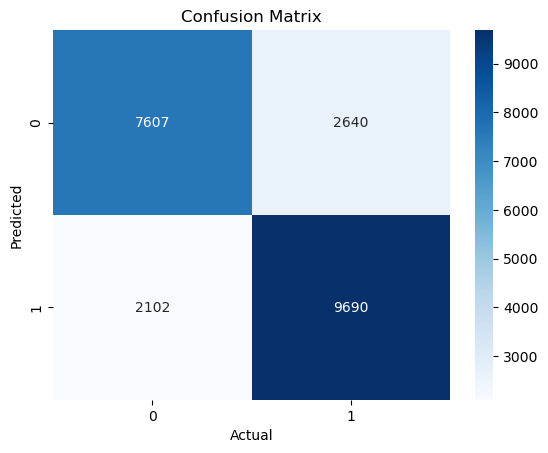

In [1761]:
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [1762]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10247
           1       0.79      0.82      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



In [1763]:
print('Accuracy Score:',(accuracy_score(y_test, xgb_pred)))
print('F-1 Score : ',(f1_score(y_test, xgb_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, xgb_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, xgb_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, xgb_pred)))    

Accuracy Score: 0.7848359725940378
F-1 Score :  0.7848359725940377
Precision Score :  0.7848359725940378
Recall Score :  0.7848359725940378
Log Loss :  7.755297625627003


## Model Evalution

### Error Evaluation

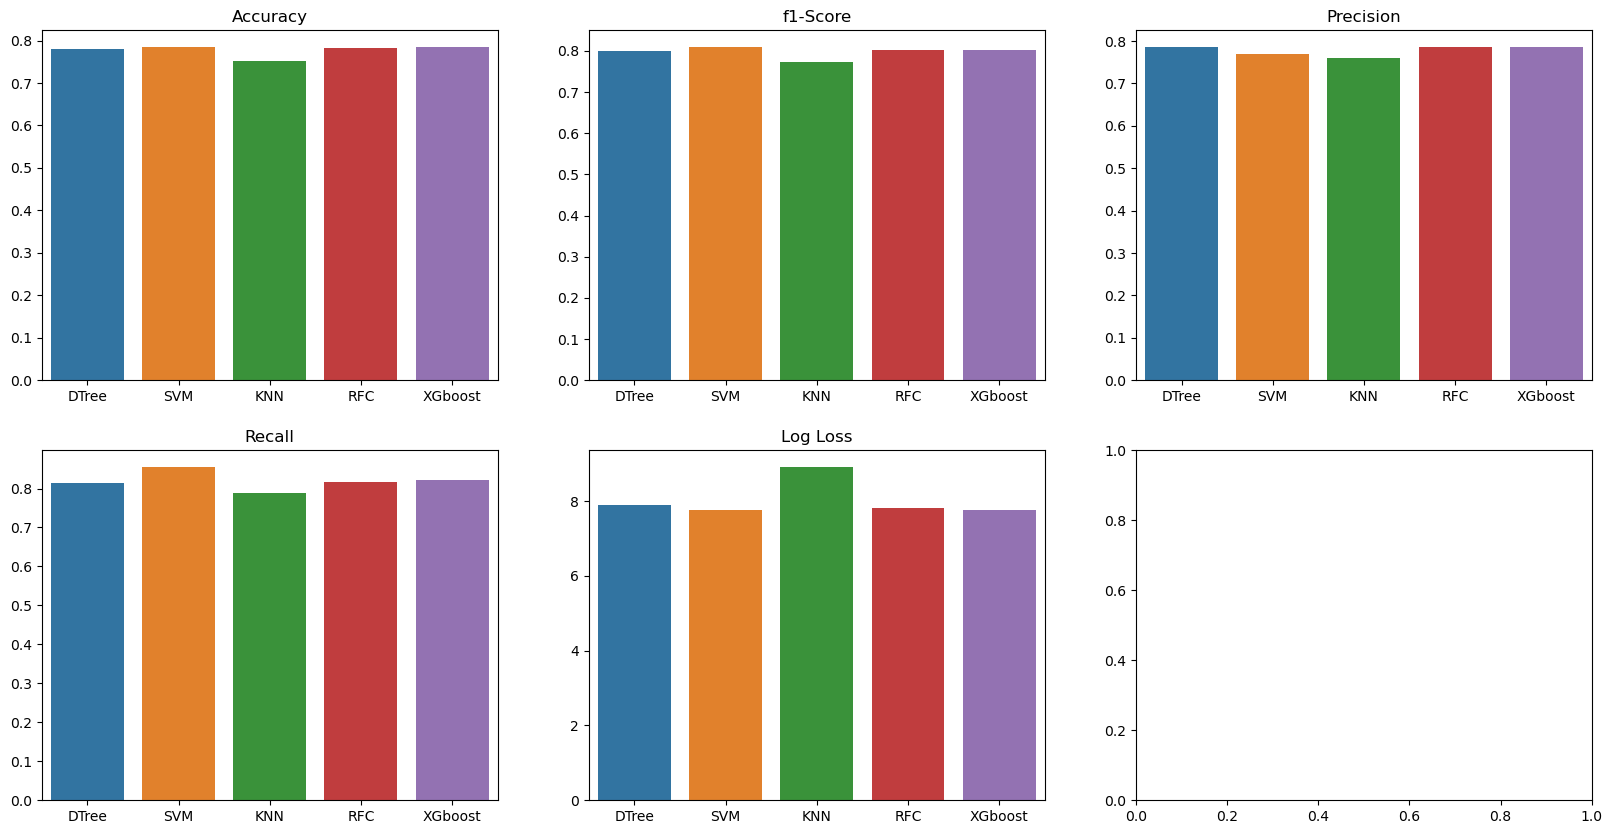

In [1764]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.barplot(x=['DTree','SVM','KNN', 'RFC', 'XGboost'],y=[accuracy_score(y_test,dtree_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,rfc_pred),accuracy_score(y_test,xgb_pred)],ax=ax[0,0])
sns.barplot(x=['DTree','SVM','KNN', 'RFC', 'XGboost'],y=[f1_score(y_test,dtree_pred),f1_score(y_test,svm_pred),f1_score(y_test,knn_pred),f1_score(y_test,rfc_pred),f1_score(y_test,xgb_pred)],ax=ax[0,1])
sns.barplot(x=['DTree','SVM','KNN', 'RFC', 'XGboost'],y=[precision_score(y_test,dtree_pred),precision_score(y_test,svm_pred),precision_score(y_test,knn_pred),precision_score(y_test,rfc_pred),precision_score(y_test,xgb_pred)],ax=ax[0,2])
sns.barplot(x=['DTree','SVM','KNN', 'RFC', 'XGboost'],y=[recall_score(y_test,dtree_pred),recall_score(y_test,svm_pred),recall_score(y_test,knn_pred),recall_score(y_test,rfc_pred),recall_score(y_test,xgb_pred)],ax=ax[1,0])
sns.barplot(x=['DTree','SVM','KNN', 'RFC', 'XGboost'],y=[log_loss(y_test,dtree_pred),log_loss(y_test,svm_pred),log_loss(y_test,knn_pred),log_loss(y_test,rfc_pred),log_loss(y_test,xgb_pred)],ax=ax[1,1])

# label for the graph
# ax[0,0].set_ylabel('Accuracy')
# ax[0,1].set_ylabel('f1-Score')
# ax[0,2].set_ylabel('Precision')
# ax[1,0].set_ylabel('Recall')
# ax[1,1].set_ylabel('Log Loss')

#model name as title
ax[0,0].set_title('Accuracy')
ax[0,1].set_title('f1-Score')
ax[0,2].set_title('Precision')
ax[1,0].set_title('Recall')
ax[1,1].set_title('Log Loss')


plt.show()

## Conclusion

1. Xgboost give the best accuracy but not much compare to RFC and SVM
2. Training and test using SVM take much latency compare to others.
3. Bining "PreviousSalary" provide more accuracy. (may try for more n value)